In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import numpy as np

from minisom import MiniSom

In [2]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
yAll=yAll/25.0
yWd= yAll[yAll >0.44]
yWd

<xarray.DataArray 'fogdata' (time: 588)>
array([0.48, 0.52, 0.6 , 0.64, 0.6 , 0.6 , 0.48, 0.48, 0.48, 0.52, 0.48,
       0.48, 0.48, 0.6 , 0.48, 0.56, 0.48, 0.52, 0.48, 0.52, 0.48, 0.52,
       0.52, 0.56, 0.56, 0.64, 0.48, 0.48, 0.48, 0.6 , 0.52, 0.6 , 0.56,
       0.48, 0.6 , 0.6 , 0.56, 0.52, 0.48, 0.52, 0.48, 0.52, 0.48, 0.48,
       0.48, 0.52, 0.48, 0.52, 0.48, 0.48, 0.52, 0.56, 0.48, 0.6 , 0.6 ,
       0.6 , 0.48, 0.56, 0.48, 0.52, 0.56, 0.48, 0.56, 0.48, 0.48, 0.6 ,
       0.6 , 0.56, 0.6 , 0.48, 0.56, 0.56, 0.52, 0.48, 0.56, 0.52, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.48, 0.48,
       0.48, 0.6 , 0.72, 0.48, 0.68, 0.48, 0.56, 0.56, 0.52, 0.64, 0.68,
       0.52, 0.72, 0.64, 0.48, 0.72, 0.48, 0.48, 0.48, 0.48, 0.56, 0.48,
       0.48, 0.56, 0.56, 0.6 , 0.52, 0.48, 0.48, 0.48, 0.6 , 0.64, 0.56,
       0.6 , 0.64, 0.64, 0.52, 0.6 , 0.6 , 0.68, 0.52, 0.6 , 0.68, 0.56,
       0.52, 0.72, 0.6 , 0.64, 0.56, 0.52, 0.52, 0.48, 0.6 , 0.6 , 0.56,
       0.52, 0.52, 0.6 , 0.76, 0.84, 0.8 , 0.64, 0.8 , 0.64, 0.72, 0.76,
       0.76, 0.52, 0.52, 0.48, 0.48, 0.6 , 0.48, 0.48, 0.56, 0.52, 0.64,
       0.56, 0.56, 0.72, 0.88, 0.76, 0.52, 0.72, 0.72, 0.64, 0.52, 0.52,
       0.56, 0.56, 0.76, 0.68, 0.52, 0.56, 0.72, 0.72, 0.72, 0.68, 0.72,
       0.56, 0.52, 0.48, 0.52, 0.52, 0.56, 0.6 , 0.68, 0.68, 0.64, 0.68,
       0.92, 0.84, 0.64, 0.56, 0.52, 0.52, 0.48, 0.56, 0.52, 0.68, 0.64,
       0.52, 0.48, 0.64, 0.48, 0.84, 0.84, 0.6 , 0.52, 0.48, 0.64, 0.72,
...
       0.72, 0.56, 0.72, 0.68, 0.76, 0.6 , 0.68, 0.72, 0.72, 0.68, 0.72,
       0.76, 0.84, 0.84, 0.8 , 0.8 , 0.84, 0.68, 0.48, 0.52, 0.64, 0.68,
       0.64, 0.48, 0.48, 0.48, 0.48, 0.48, 0.6 , 0.72, 0.72, 0.68, 0.48,
       0.64, 0.76, 0.8 , 0.68, 0.6 , 0.56, 0.52, 0.56, 0.6 , 0.68, 0.52,
       0.56, 0.64, 0.64, 0.48, 0.48, 0.56, 0.68, 0.52, 0.6 , 0.48, 0.48,
       0.52, 0.48, 0.68, 0.64, 0.64, 0.56, 0.56, 0.56, 0.48, 0.64, 0.6 ,
       0.52, 0.56, 0.52, 0.52, 0.6 , 0.52, 0.48, 0.76, 0.6 , 0.68, 0.64,
       0.48, 0.48, 0.64, 0.48, 0.6 , 0.72, 0.68, 0.56, 0.48, 0.56, 0.56,
       0.52, 0.56, 0.56, 0.64, 0.72, 0.6 , 0.8 , 0.8 , 0.76, 0.72, 0.6 ,
       0.68, 0.8 , 0.76, 0.72, 0.76, 0.48, 0.64, 0.68, 0.56, 0.48, 0.56,
       0.52, 0.56, 0.52, 0.52, 0.64, 0.72, 0.48, 0.6 , 0.52, 0.52, 0.52,
       0.6 , 0.64, 0.6 , 0.48, 0.48, 0.56, 0.56, 0.48, 0.48, 0.52, 0.52,
       0.48, 0.56, 0.76, 0.6 , 0.48, 0.52, 0.48, 0.48, 0.6 , 0.6 , 0.72,
       0.48, 0.56, 0.72, 0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76,
       0.52, 0.52, 0.68, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64, 0.64,
       0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.48, 0.56,
       0.64, 0.56, 0.72, 0.72, 0.52, 0.56, 0.6 , 0.48, 0.52, 0.48, 0.64,
       0.6 , 0.56, 0.68, 0.68, 0.68, 0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68,
       0.52, 0.68, 0.64, 0.48, 0.48, 0.52, 0.52, 0.68, 0.68, 0.56, 0.48,
       0.56, 0.64, 0.6 , 0.64, 0.64])
Coordinates:
  * time     (time) datetime64[ns] 1983-01-04 1983-01-05 ... 2018-01-29

In [9]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
z500Data
z=z500Data.z.shift(time=1)
z.values=z.values/9.81
#z

In [10]:
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'))
yAll['time'] = decJanAnomz.time
wfdZAnom=decJanAnomz[yAll >0.44,:,:]
wfdZAnom

<xarray.DataArray 'z' (time: 588, latitude: 46, longitude: 180)>
array([[[-134.20117  , -134.20117  , -134.20117  , ..., -134.20117  ,
         -134.20117  , -134.20117  ],
        [-187.81348  , -186.83887  , -185.8125   , ..., -190.41602  ,
         -189.59717  , -188.7251   ],
        [-233.7207   , -228.96582  , -224.23242  , ..., -247.7378   ,
         -243.18848  , -238.5039   ],
        ...,
        [  -3.0063477,   -2.7285156,   -2.9375   , ...,   -1.1479492,
           -2.494629 ,   -3.3769531],
        [  -2.5371094,   -2.5322266,   -2.4960938, ...,   -1.8955078,
           -2.8330078,   -3.3061523],
        [  -2.140625 ,   -2.2919922,   -2.2905273, ...,   -1.6489258,
           -2.3398438,   -2.6889648]],

       [[-190.76611  , -190.76611  , -190.76611  , ..., -190.76611  ,
         -190.76611  , -190.76611  ],
        [-230.63232  , -229.64697  , -228.66992  , ..., -233.49658  ,
         -232.55225  , -231.61084  ],
        [-260.88574  , -258.6211   , -256.29785  , ..., -268.04395  ,
         -265.5664   , -263.2124   ],
...
        [ -12.855957 ,  -12.249023 ,  -11.794922 , ...,  -11.713867 ,
          -13.201172 ,  -12.945801 ],
        [ -11.823242 ,  -11.150391 ,   -9.933105 , ...,  -11.909668 ,
          -13.458008 ,  -13.243652 ],
        [ -11.362305 ,  -11.784668 ,   -9.362793 , ...,  -12.331055 ,
          -12.525391 ,  -12.706543 ]],

       [[  14.219238 ,   14.219238 ,   14.219238 , ...,   14.219238 ,
           14.219238 ,   14.219238 ],
        [  31.90625  ,   30.997559 ,   30.075684 , ...,   34.40869  ,
           33.603027 ,   32.757324 ],
        [  39.208496 ,   38.03076  ,   36.86914  , ...,   42.335938 ,
           41.364746 ,   40.319824 ],
        ...,
        [  -8.09668  ,   -8.479004 ,   -8.885742 , ...,   -9.441895 ,
           -7.894043 ,   -7.629883 ],
        [  -8.478516 ,   -9.220215 ,   -8.129395 , ...,   -6.770508 ,
           -5.1220703,   -6.484375 ],
        [  -7.2646484,   -9.343262 ,   -8.600586 , ...,   -5.428711 ,
           -4.2700195,   -5.6411133]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'

In [11]:
decJanz=z[(z.time.dt.month>11) | (z.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(33,24),longitude=slice(72,87))
yAll['time'] = decJanz.time
# get WFD daily anomaly
wfdZ=decJanz[yAll >0.44,:,:]

In [13]:
#wfdZ

In [7]:
#decJanz

In [14]:
data=wfdZ.stack(z=( "latitude","longitude"))

# Data normalization
data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)

#tolist()
#len(data[0])

data = data.values
data

array([[ 0.6146765 ,  0.4008482 ,  0.09126414, ..., -0.8011924 ,
        -1.3487742 , -1.9417403 ],
       [ 0.50670296,  0.37806207,  0.18811867, ..., -0.2962949 ,
        -0.71373427, -1.2107255 ],
       [ 0.24778491,  0.15012668,  0.00914092, ..., -0.10227468,
        -0.45724338, -0.91767156],
       ...,
       [-0.830842  , -1.1083542 , -1.448687  , ..., -1.3039701 ,
        -1.4580096 , -1.6051003 ],
       [-0.78567845, -0.9334822 , -1.1438018 , ..., -0.5759808 ,
        -0.7581716 , -1.0271528 ],
       [-0.45771235, -0.4731415 , -0.5607457 , ...,  0.3497442 ,
         0.3073927 ,  0.22189054]], dtype=float32)

In [15]:
n_row=2
m_col=2
som = MiniSom(n_row, m_col, len(data[0]),neighborhood_function='gaussian', random_seed=50)
som.pca_weights_init(data)
som.train(data, 100000, verbose=False)  # random training

In [16]:
label=[]
for x in data :
    intlabel=som.winner(x)
    label.append(str(intlabel[0])+"_"+str(intlabel[1]))

#label    

In [17]:
wfdZS=wfdZAnom.assign_coords(somlabel=('time',label))
#wfdZS.somlabel

In [19]:
soms=wfdZS.groupby('somlabel').mean()
som1=soms.sel(somlabel='0_0')
som2=soms.sel(somlabel='0_1')
som3=soms.sel(somlabel='1_0')
som4=soms.sel(somlabel='1_1')
#som5=soms.sel(somlabel='1_1')
#som6=soms.sel(somlabel='1_2')

In [20]:
soms_n=wfdZS.groupby('somlabel').count()
soms_n[:,0,0]

<xarray.DataArray 'z' (somlabel: 4)>
array([167, 138,  93, 190])
Coordinates:
    longitude  float32 0.0
    latitude   float32 90.0
  * somlabel   (somlabel) object '0_0' '0_1' '1_0' '1_1'

In [21]:
som1_cube=som1.to_iris()
som2_cube=som2.to_iris()
som3_cube=som3.to_iris()
som4_cube=som4.to_iris()
#som5_cube=som5.to_iris()
#som6_cube=som6.to_iris()




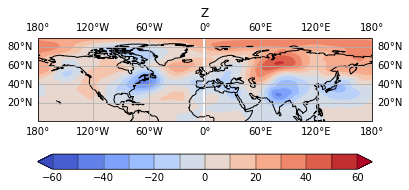

In [22]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som1_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

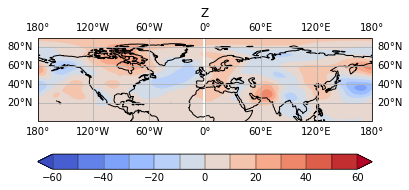

In [23]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som2_cube, cmap='coolwarm',extend='both',levels=levels)
#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

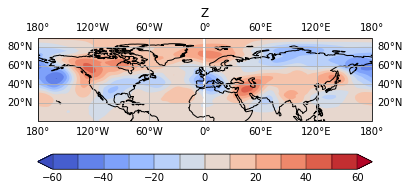

In [24]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som3_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

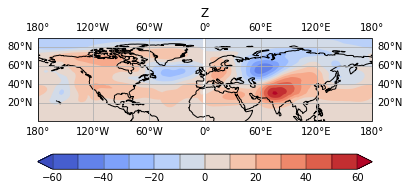

In [25]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som4_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()